## 와인 분류 모델

` y 값은 type(red, white)로 설정 `

#### 데이터셋 컬럼 정보

- type: 레드와인인지 화이트 와인인지 구별
- fixed acidity: 고정산도
- volatile acidity: 휘발성 산도 (와인의 향에 연관이 많다)
- citric acid: 시트르산(구연산) (와인의 신선함 올려주는 역할, 산성화에 연관 미친다)
- residual sugar: 잔여당분 (와인의 단맛을 올려준다)
- chlorides: 염화물 (와인의 짠맛의 원인이며, 신맛을 좌우하는 성분)
- free sulfur dioxide: 활성 이산화황 (이산화황은 원하지 않는 박테리아와 효모를 죽여서 와인을 오래 보관하는 역할)
- total sulfur dioxide: 총 이산화황
- density: 밀도 (와인의 바디감, 무게감 의미)
- pH: 산성도 (와인의 신맛의 정도를 나타낸다)
- sulphates: 황산염
- alcohol: 알코올도수 (와인의 바디감에 영향준다)
- quality: 등급

In [219]:
# 필요한 라이브러리 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
# csv 파일 가져오기
df = pd.read_csv('/content/drive/MyDrive/dataset/wine-quality-white-and-red.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [222]:
df.shape

(6497, 13)

In [223]:
# 데이터셋 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<Axes: xlabel='type', ylabel='count'>

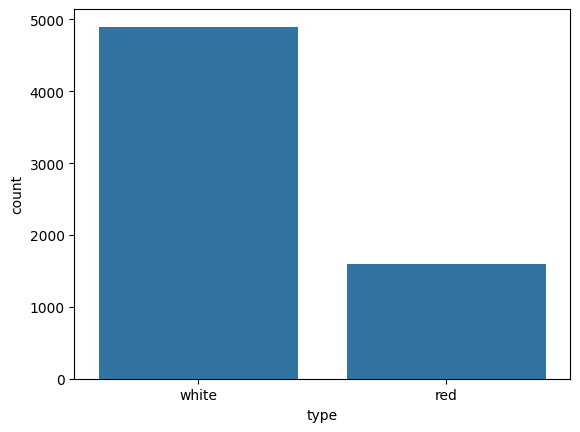

In [224]:
# target 컬럼인 type의 비율 확인
sns.countplot(data=df, x="type")

In [225]:
# type의 값에 따른 새로운 데이터셋
df['type'] = df['type'].replace({'white': 0, 'red': 1})
df_w = df[df["type"] == 0]
df_r = df[df["type"] == 1]
df_w.shape, df_r.shape

((4898, 13), (1599, 13))

In [226]:
# 컬럼들이 float 형이기 때문에 최대값 최소값 같은 정보 확인
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


* 결측치는 없는 듯한 모습

In [227]:
# y컬럼인 type을 뺀 나머지 컬럼
feature_columns = df.columns[1:].tolist()
feature_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [228]:
df.groupby(["pH"])["type"].mean()

pH
2.72    0.0
2.74    0.5
2.77    0.0
2.79    0.0
2.80    0.0
       ... 
3.81    0.0
3.82    0.0
3.85    1.0
3.90    1.0
4.01    1.0
Name: type, Length: 108, dtype: float64

0 fixed acidity 0 0


<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')


1 volatile acidity 0 1


<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')


2 citric acid 0 2
3

<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')


 residual sugar 1 0


<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')


4 chlorides 1 1


<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')


5 free sulfur dioxide 1 2


<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')


6 total sulfur dioxide 2 0


<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')


7 density 2 1


<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')


8 pH 2 2


<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')


9 sulphates 3 0


<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')


10 alcohol 3 1
11 quality 3 2


<ipython-input-229-0b67001a77c7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
<ipython-input-229-0b67001a77c7>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')
<ipython-input-229-0b67001a77

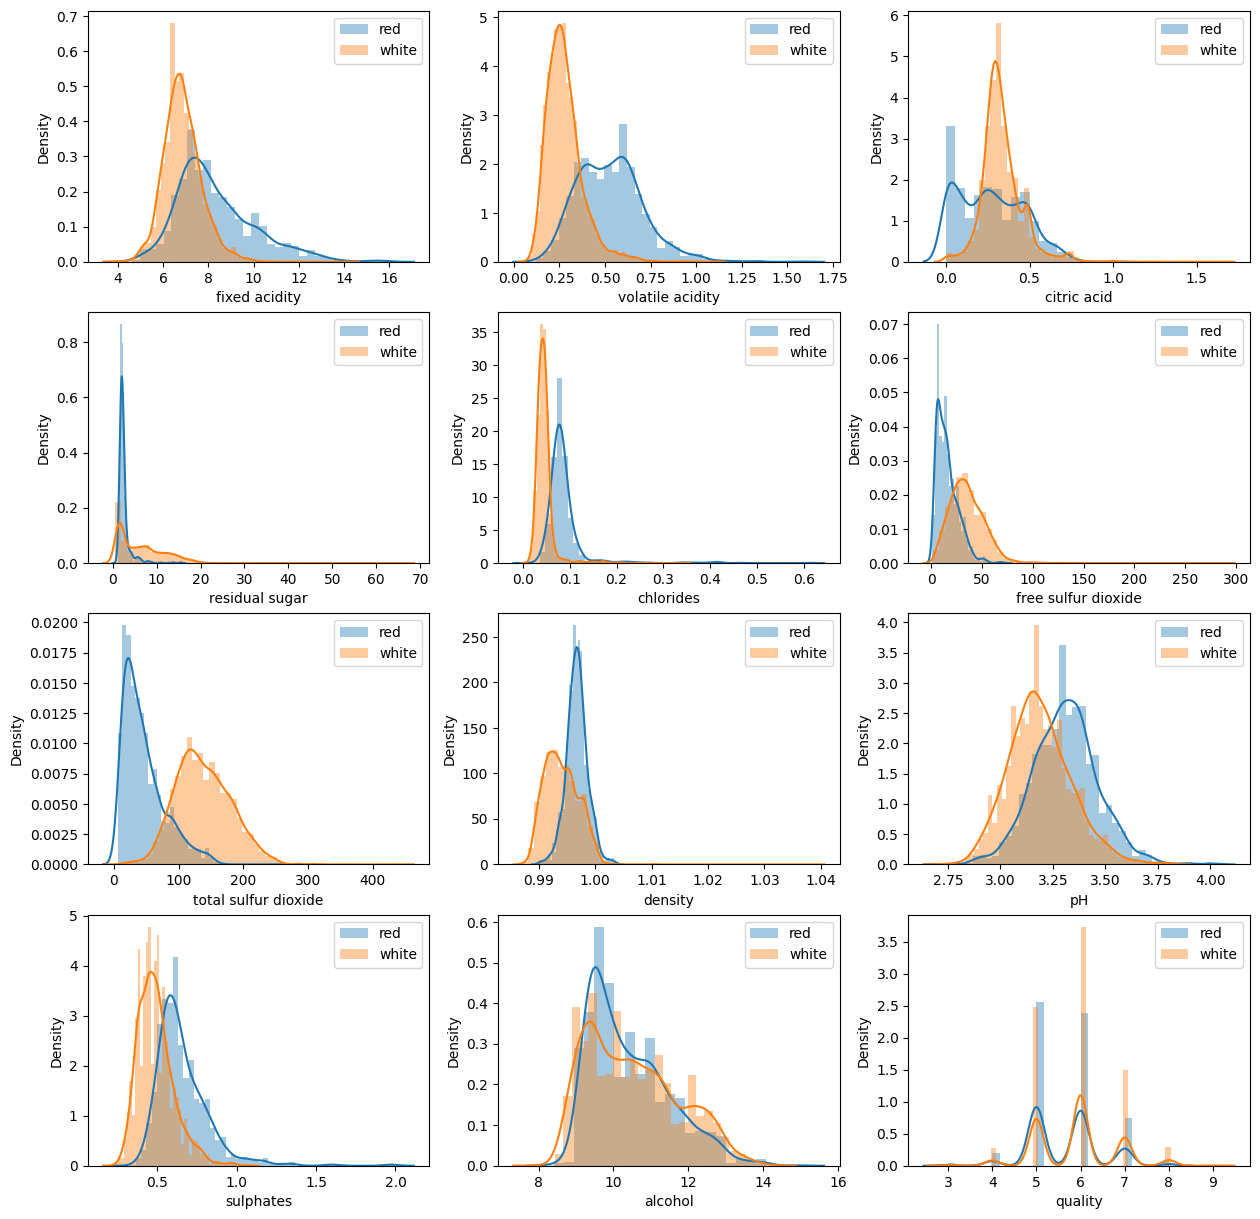

In [229]:
# 한번에 컬럼들의 red, white 분포 확인
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

for i, col_name in enumerate(feature_columns):
    row = i // 3
    col = i % 3
    print(i, col_name, row, col)
    # type 에 따라 다르게 그리기
    sns.distplot(df_r[col_name], ax=axes[row][col], label = 'red')
    sns.distplot(df_w[col_name], ax=axes[row][col], label = 'white')

    axes[row][col].legend()

In [230]:
df_corr = df.corr()
df_corr.style.background_gradient()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.486740,0.653036,-0.187397,-0.348821,0.512678,-0.471644,-0.700357,0.390645,0.329129,0.487218,-0.032970,-0.119323
fixed acidity,0.486740,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.653036,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,-0.187397,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.348821,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.512678,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.471644,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.390645,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,0.329129,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506


<Axes: >

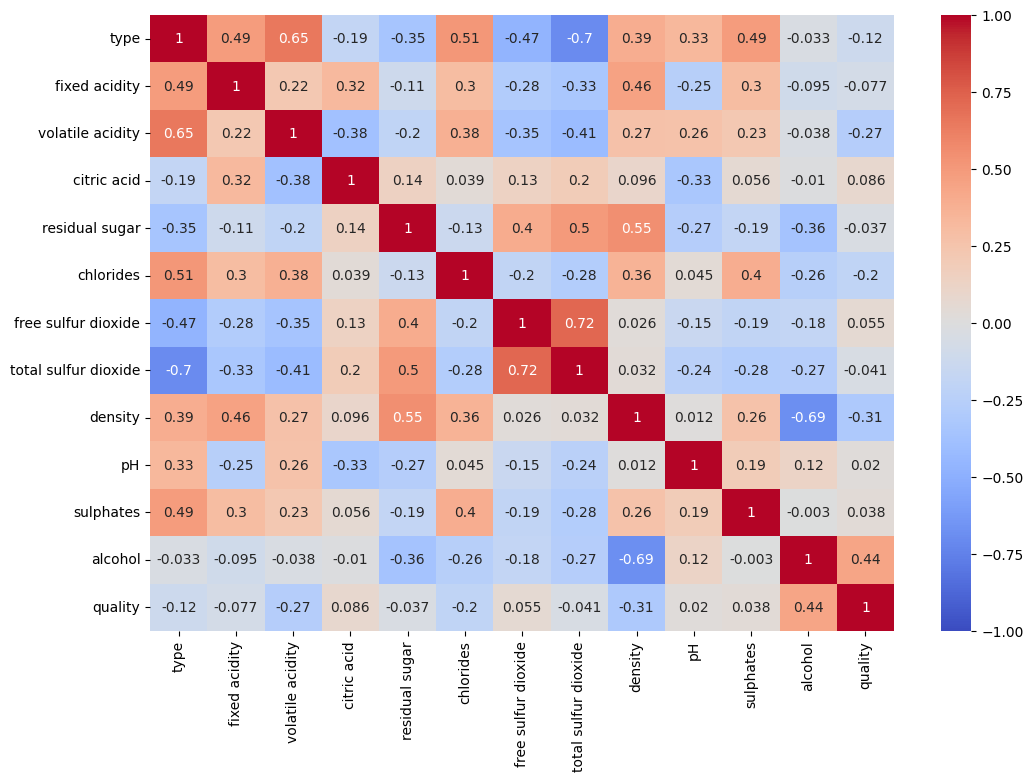

In [231]:
# 위에서 구한 상관계수를 heatmap 으로 시각화
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

* 위의 subplot과 heatmap을 보았을 때,

  1) `free sulfur dioxide`와 `total sulfur dioxide` 는 범주형 데이터로 바꾸어보기.

    -> 혹은 두 컬럼간의 상관관계가 너무 크므로 한 컬럼은 drop?
  
  2) `quality` 와 `alcohol`은 'red'와 'white'에 따라 다른가? 에 대한 의문. drop해보기.

  3) `residual sugar` 는 생각해보기

In [232]:
df.drop('quality', axis=1, inplace=True)
df.drop('alcohol', axis=1, inplace=True)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40
...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71


<Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

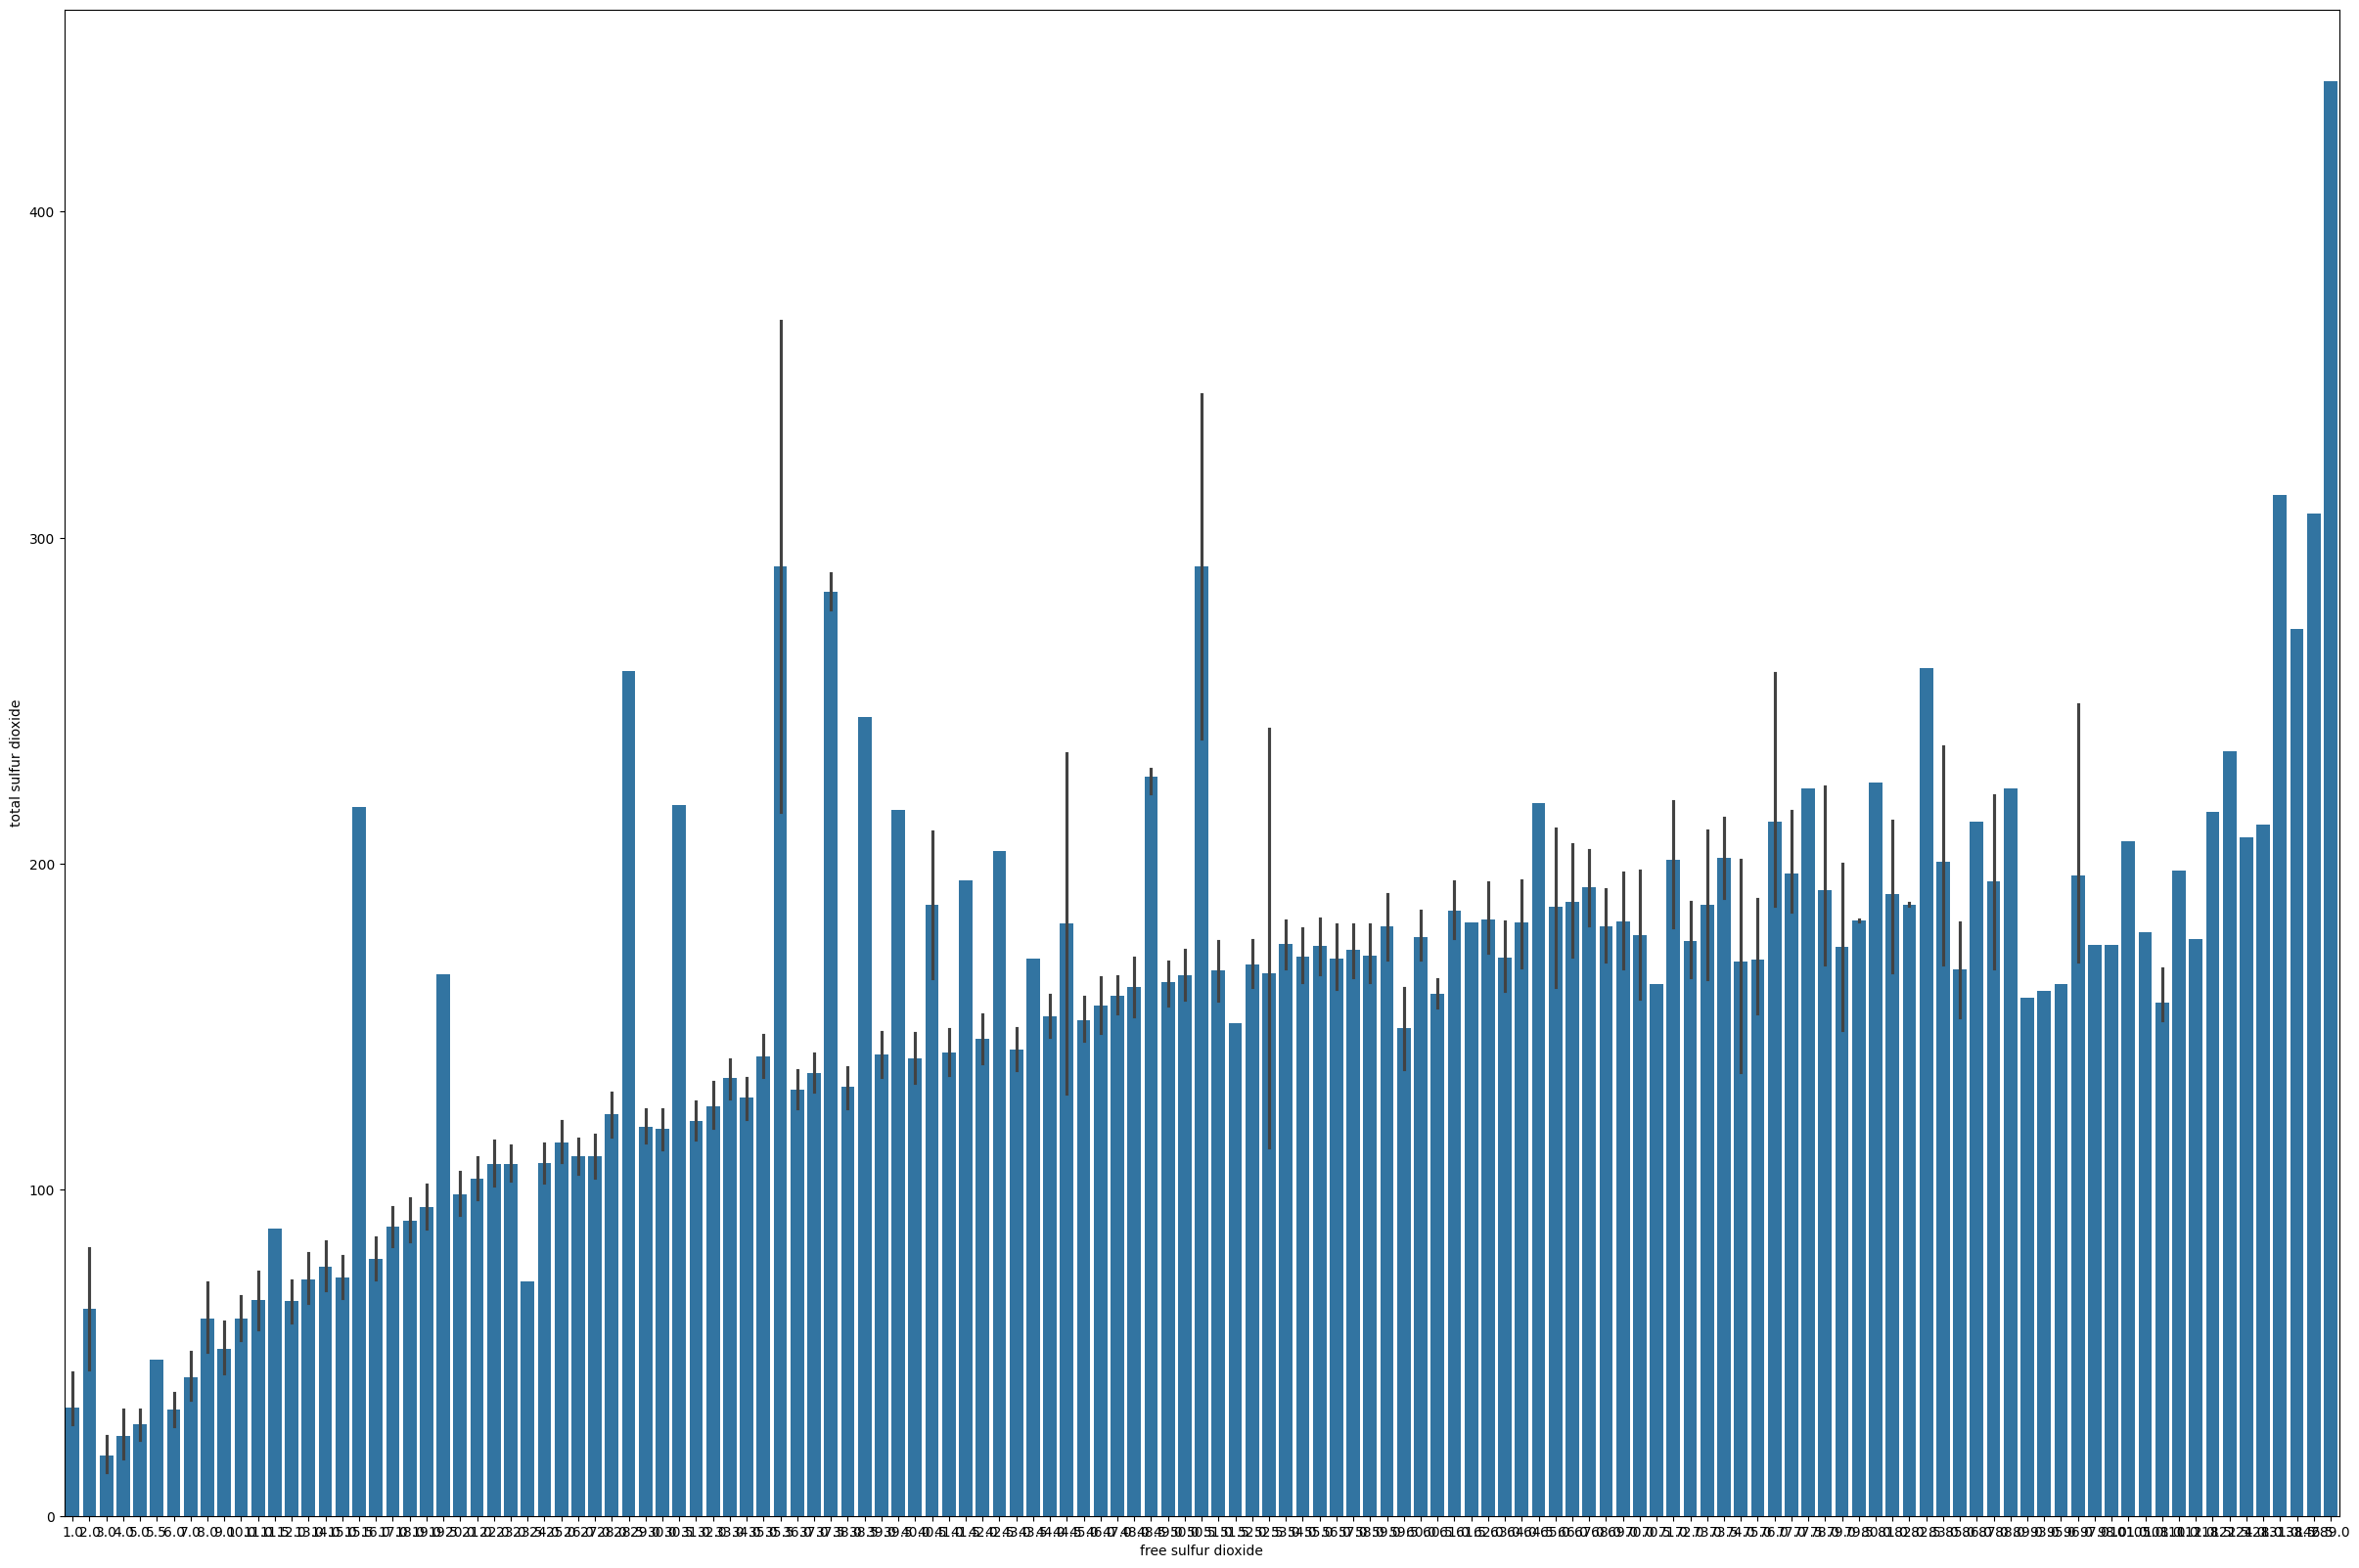

In [233]:
# 1) 에서 말한 두 컬럼의 관계 살펴보기
plt.figure(figsize=(30,20))
sns.barplot(data=df, x="free sulfur dioxide", y="total sulfur dioxide")

* 비슷한 듯 하지만 조금씩 다른 부분이 있으므로 한 컬럼 drop 하지말고 범주형 데이터로 바꿔보기

In [234]:
# 바뀐 컬럼에 맞추기
df['type'] = df['type'].replace({'white': 0, 'red': 1})
df_w = df[df["type"] == 0]
df_r = df[df["type"] == 1]
df_w.shape, df_r.shape

((4898, 11), (1599, 11))

In [235]:
feature_columns = df.columns[1:].tolist()
feature_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates']

In [236]:
df_w.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
count,4898.0,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.0,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847
std,0.0,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126
min,0.0,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000
25%,0.0,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000
50%,0.0,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000
75%,0.0,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000
max,0.0,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000


In [237]:
df_r.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
count,1599.0,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,1.0,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149
std,0.0,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507
min,1.0,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000
25%,1.0,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000
50%,1.0,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000
75%,1.0,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000
max,1.0,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000


In [238]:
# df_w 에서 1사분위수인 23과 df_r 에서 3사분위수인 21 사이의 값인 22로 나눠보기
df["low free sulfur dioxide"] = df["free sulfur dioxide"] < 22
df["high free sulfur dioxide"] = df["free sulfur dioxide"] >= 22
df[["free sulfur dioxide","low free sulfur dioxide"]].head()

,free sulfur dioxide,low free sulfur dioxide
0,45.0,False
1,14.0,True
2,30.0,False
3,47.0,False
4,47.0,False


In [239]:
df["low total sulfur dioxide"] = df["total sulfur dioxide"] < 75
df["high total sulfur dioxide"] = df["total sulfur dioxide"] >= 75
df[["total sulfur dioxide","low total sulfur dioxide"]].head()

,total sulfur dioxide,low total sulfur dioxide
0,170.0,False
1,132.0,False
2,97.0,False
3,186.0,False
4,186.0,False


<Axes: >

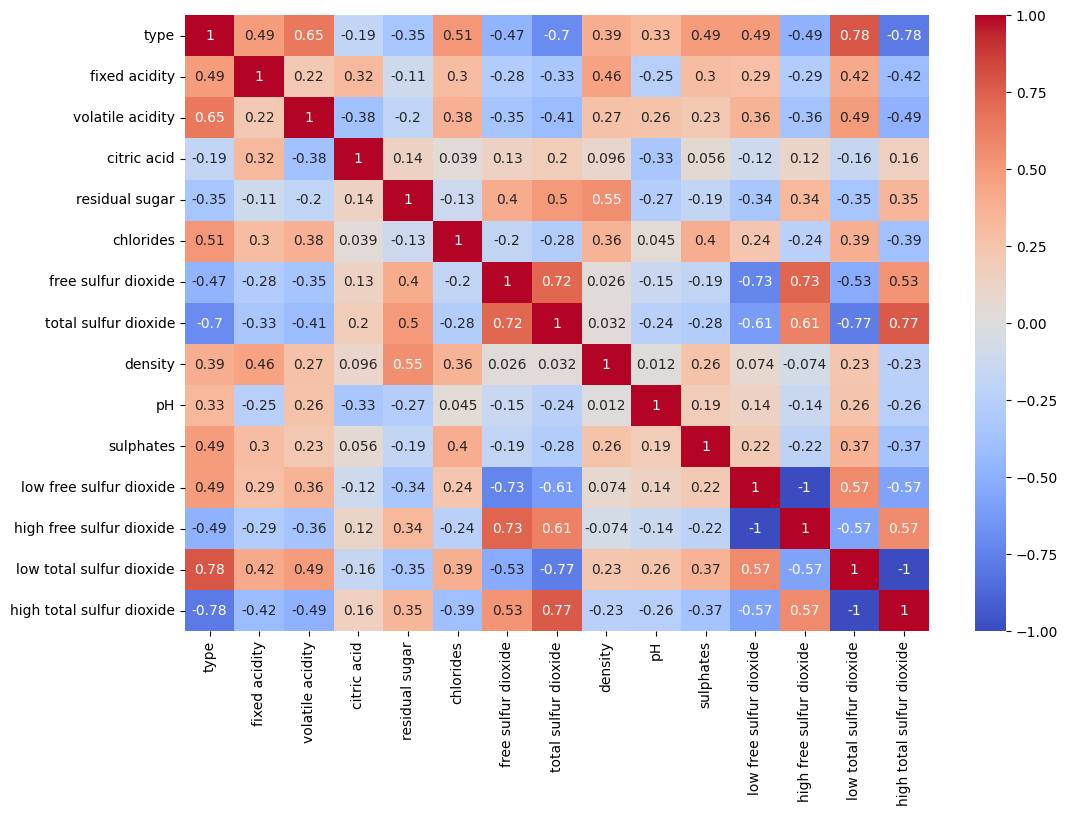

In [241]:
# 어떤 차이가 있나 비교
df_corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

* 범주형 컬럼에서 low 쪽 컬럼들이 type과 상관관계가 높은 모습

In [242]:
# 학습을 위한 데이터프레임
df_train = df
df_train = df_train.drop('type', axis=1)
df_train = df_train.drop('total sulfur dioxide', axis=1)
df_train = df_train.drop('high total sulfur dioxide', axis=1)
df_train = df_train.drop('free sulfur dioxide', axis=1)
df_train = df_train.drop('high free sulfur dioxide', axis=1)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fixed acidity             6497 non-null   float64
 1   volatile acidity          6497 non-null   float64
 2   citric acid               6497 non-null   float64
 3   residual sugar            6497 non-null   float64
 4   chlorides                 6497 non-null   float64
 5   density                   6497 non-null   float64
 6   pH                        6497 non-null   float64
 7   sulphates                 6497 non-null   float64
 8   low free sulfur dioxide   6497 non-null   bool   
 9   low total sulfur dioxide  6497 non-null   bool   
dtypes: bool(2), float64(8)
memory usage: 418.9 KB


<Axes: >

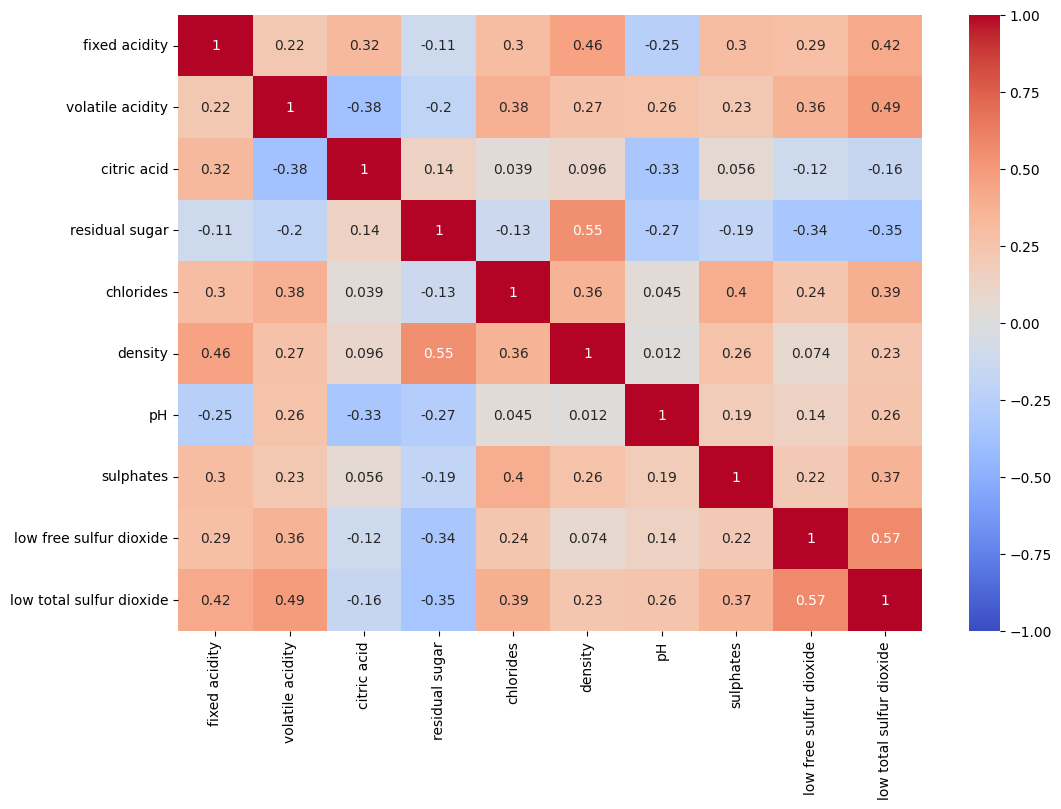

In [243]:
df_corr2 = df_train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_corr2, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [244]:
df_train.shape

(6497, 10)

In [245]:
df['type'].shape

(6497,)

In [246]:
X = df_train
y = df["type"]

In [254]:
# 학습 데이터와 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

In [255]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [256]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [257]:
# 예측값
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

In [258]:
model.score(X_test,y_test)

0.9892307692307692

In [259]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_predict)}")

Accuracy: 0.9892307692307692


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

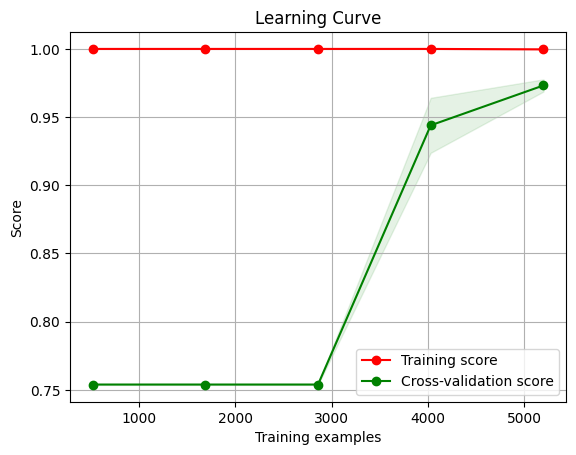

In [263]:
# 학습 곡선 그려보기
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(model, "Learning Curve", X, y, cv=5)